# Modin Implementation of pandas.dataframe.groupby

In [16]:
import modin.pandas as pd

In [17]:
pd.__version__

'0.4.0'

In [18]:
df = pd.read_csv("Team_Records.csv")

In [19]:
df.head()

,Season,Lg,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top WS
0,2017-18,NBA,Boston Celtics,29,10,0.744,1,4.38,95.4,-1.7,108.0,0.2,102.8,-5.0,NaN,B. Stevens (29-10),K. Irving (5.7)
1,2016-17,NBA,Boston Celtics*,53,29,0.646,1,2.25,96.8,0.4,111.2,2.4,108.4,-0.4,Lost E. Conf. Finals,B. Stevens (53-29),I. Thomas (12.5)
2,2015-16,NBA,Boston Celtics*,48,34,0.585,2,2.84,98.5,2.7,106.8,0.4,103.6,-2.8,Lost E. Conf. 1st Rnd.,B. Stevens (48-34),I. Thomas (9.7)
3,2014-15,NBA,Boston Celtics*,40,42,0.488,2,-0.40,95.8,1.9,104.7,-0.9,104.5,-1.1,Lost E. Conf. 1st Rnd.,B. Stevens (40-42),T. Zeller (6.5)
4,2013-14,NBA,Boston Celtics,25,57,0.305,4,-4.97,93.3,-0.6,102.9,-3.8,107.7,1.0,NaN,B. Stevens (25-57),B. Bass (5.1)


In [44]:
teams = df[['Team']]
teams = teams.groupby(['Team']).size()
teams

Atlanta Hawks              17
Atlanta Hawks*             33
Baltimore Bullets           3
Baltimore Bullets*          7
Boston Celtics             18
Boston Celtics*            54
Brooklyn Nets               3
Brooklyn Nets*              3
Buffalo Braves              5
Buffalo Braves*             3
Capital Bullets*            1
Charlotte Bobcats           8
Charlotte Bobcats*          2
Charlotte Hornets          10
Charlotte Hornets*          8
Chicago Bulls              17
Chicago Bulls*             35
Chicago Packers             1
Chicago Zephyrs             1
Cincinnati Royals           8
Cincinnati Royals*          7
Cleveland Cavaliers        27
Cleveland Cavaliers*       21
Dallas Chaparrals           1
Dallas Chaparrals*          4
Dallas Mavericks           17
Dallas Mavericks*          21
Denver Nuggets             18
Denver Nuggets*            26
Denver Rockets*             7
                           ..
Portland Trail Blazers     15
Portland Trail Blazers*    33
Rochester 

teams.sort_values(['W'], ascending=False).head()

With vs Without Modin, along with screenshots of source code

In [45]:
df2 = pd.read_csv("crime_data.csv")

In [46]:
df2.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,151521112,11/04/2015,11/03/2015,2230,NaN,N Hollywood,1555,330,BURGLARY FROM VEHICLE,0344,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CAMARILLO ST,NaN,"(34.1577, -118.3727)"
1,151521113,11/04/2015,10/30/2015,200,NaN,N Hollywood,1548,330,BURGLARY FROM VEHICLE,0344 1609 1307,...,NaN,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CHANDLER BL,NaN,"(34.1681, -118.3724)"
2,151521117,11/04/2015,11/04/2015,1400,NaN,N Hollywood,1506,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421,...,VERBAL THREAT,JA,Juv Arrest,930.0,NaN,NaN,NaN,7300 BAKMAN AV,NaN,"(34.203, -118.3779)"
3,151521121,11/04/2015,04/28/2015,2125,NaN,N Hollywood,1567,121,"RAPE, FORCIBLE",2000 0429 1241 0416 0400 0527 1813 2002,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,121.0,NaN,NaN,NaN,10700 LANDALE ST,NaN,"(34.1513, -118.3642)"
4,151521123,11/05/2015,10/27/2015,600,NaN,N Hollywood,1515,354,THEFT OF IDENTITY,0100 1822,...,NaN,IC,Invest Cont,354.0,NaN,NaN,NaN,11700 LEMAY ST,NaN,"(34.1912, -118.3891)"


In [47]:
df2.groupby(['Status Description']).size()

Adult Arrest     197687
Adult Other      221142
Invest Cont     1488974
Juv Arrest        14798
Juv Other          4767
UNK                  31
dtype: int64

In [59]:
from IPython.display import SVG, display

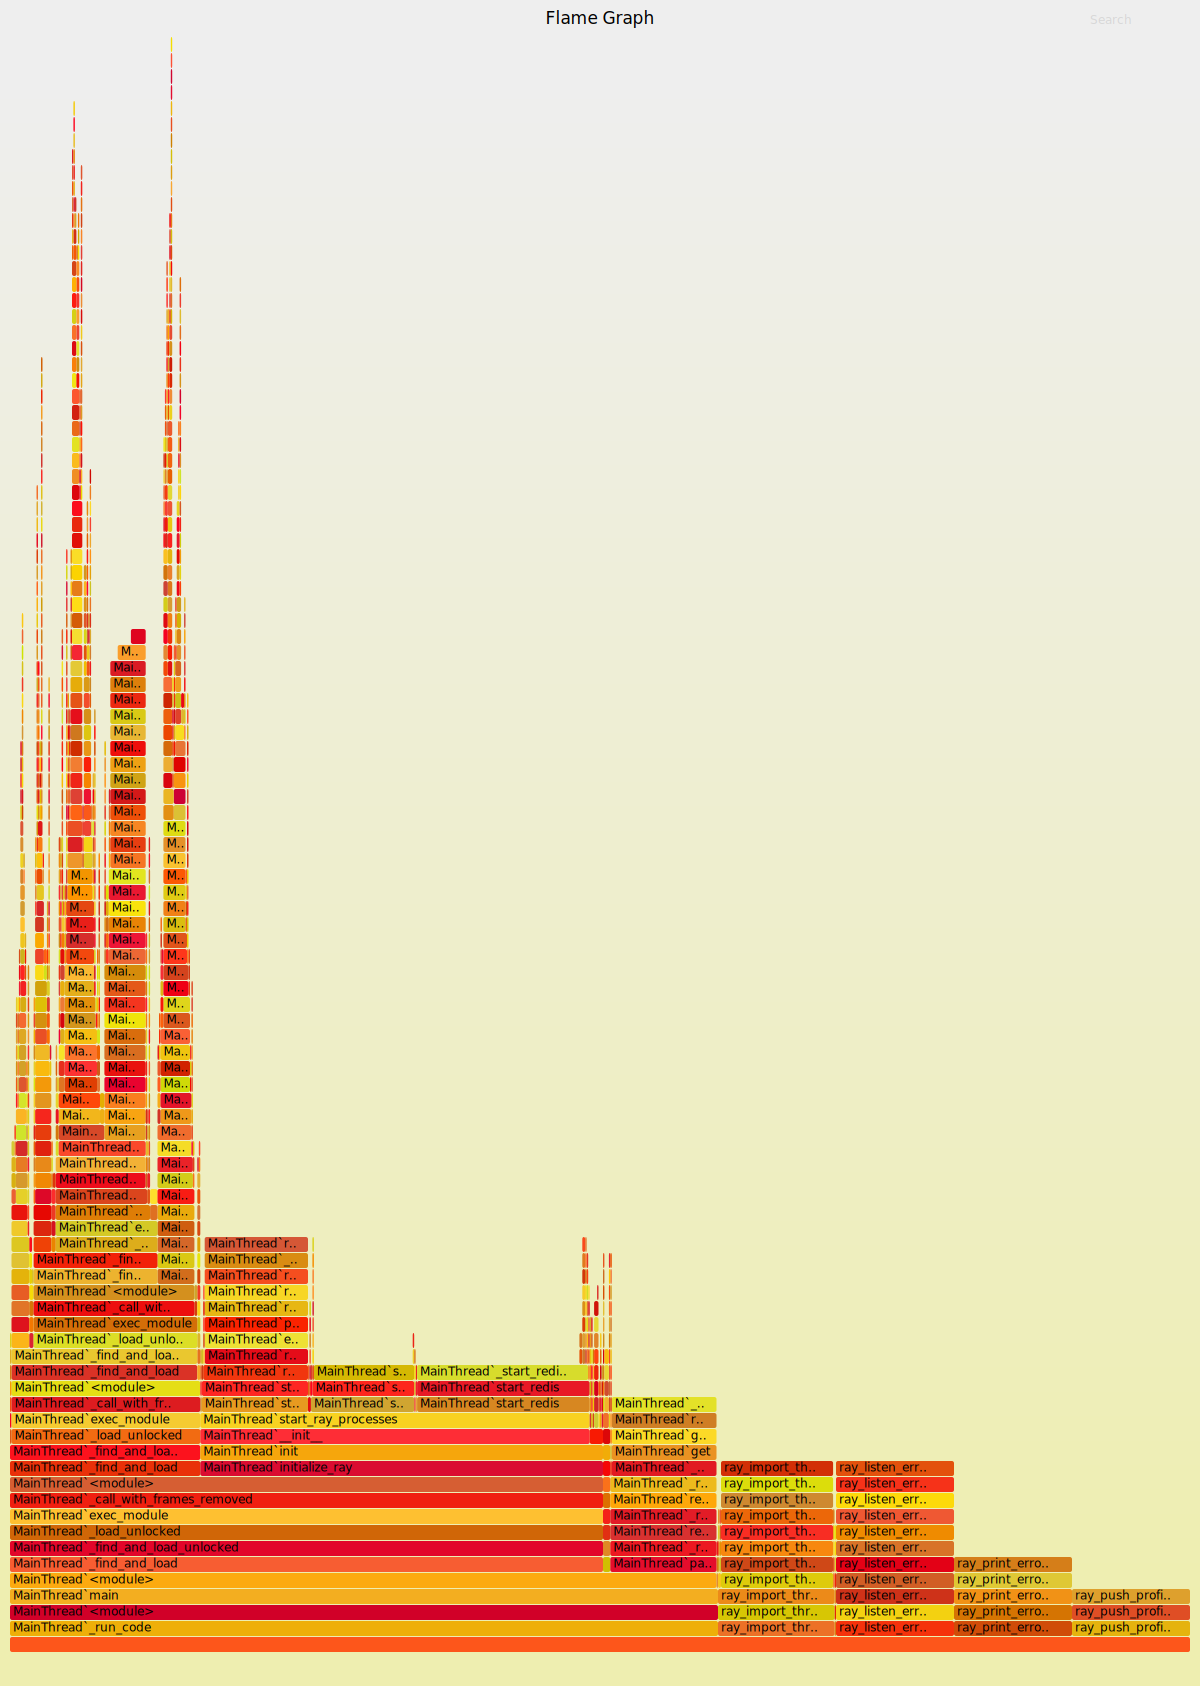

In [60]:
display(SVG("img/modin_groupby.svg"))

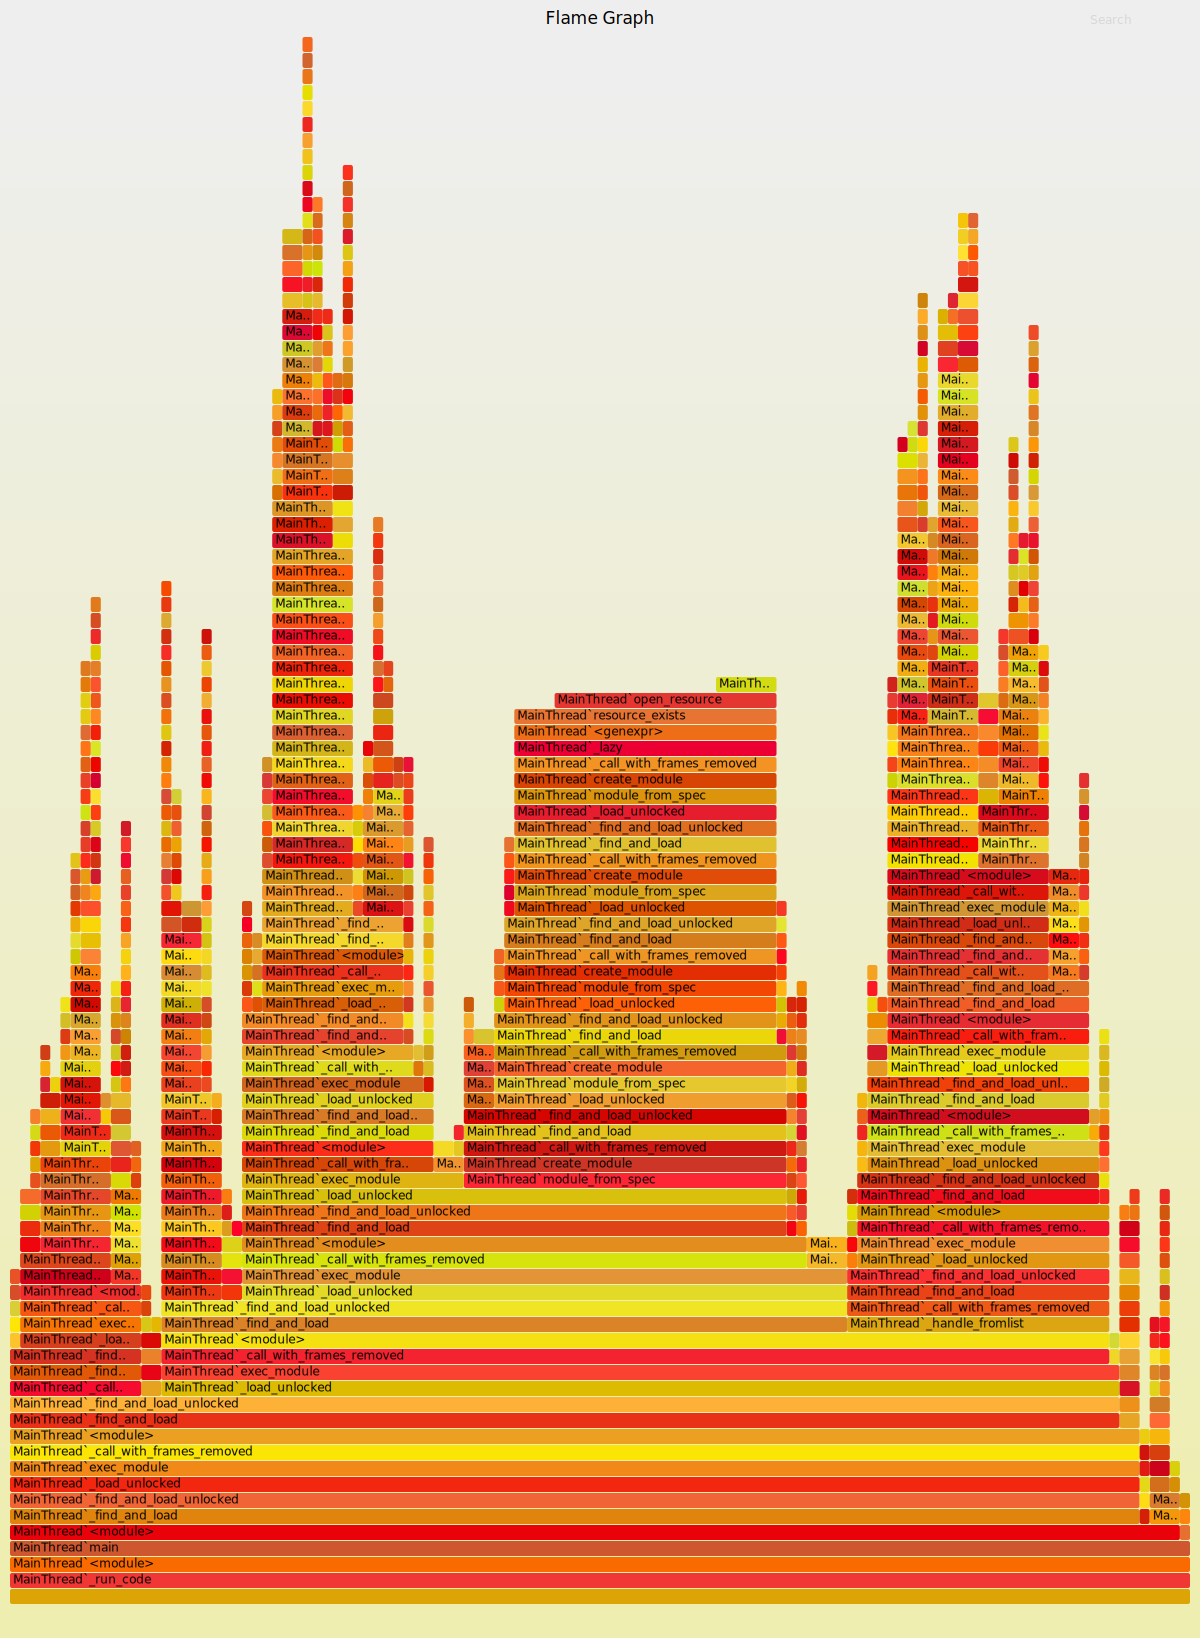

In [61]:
display(SVG("img/pandas_groupby.svg"))

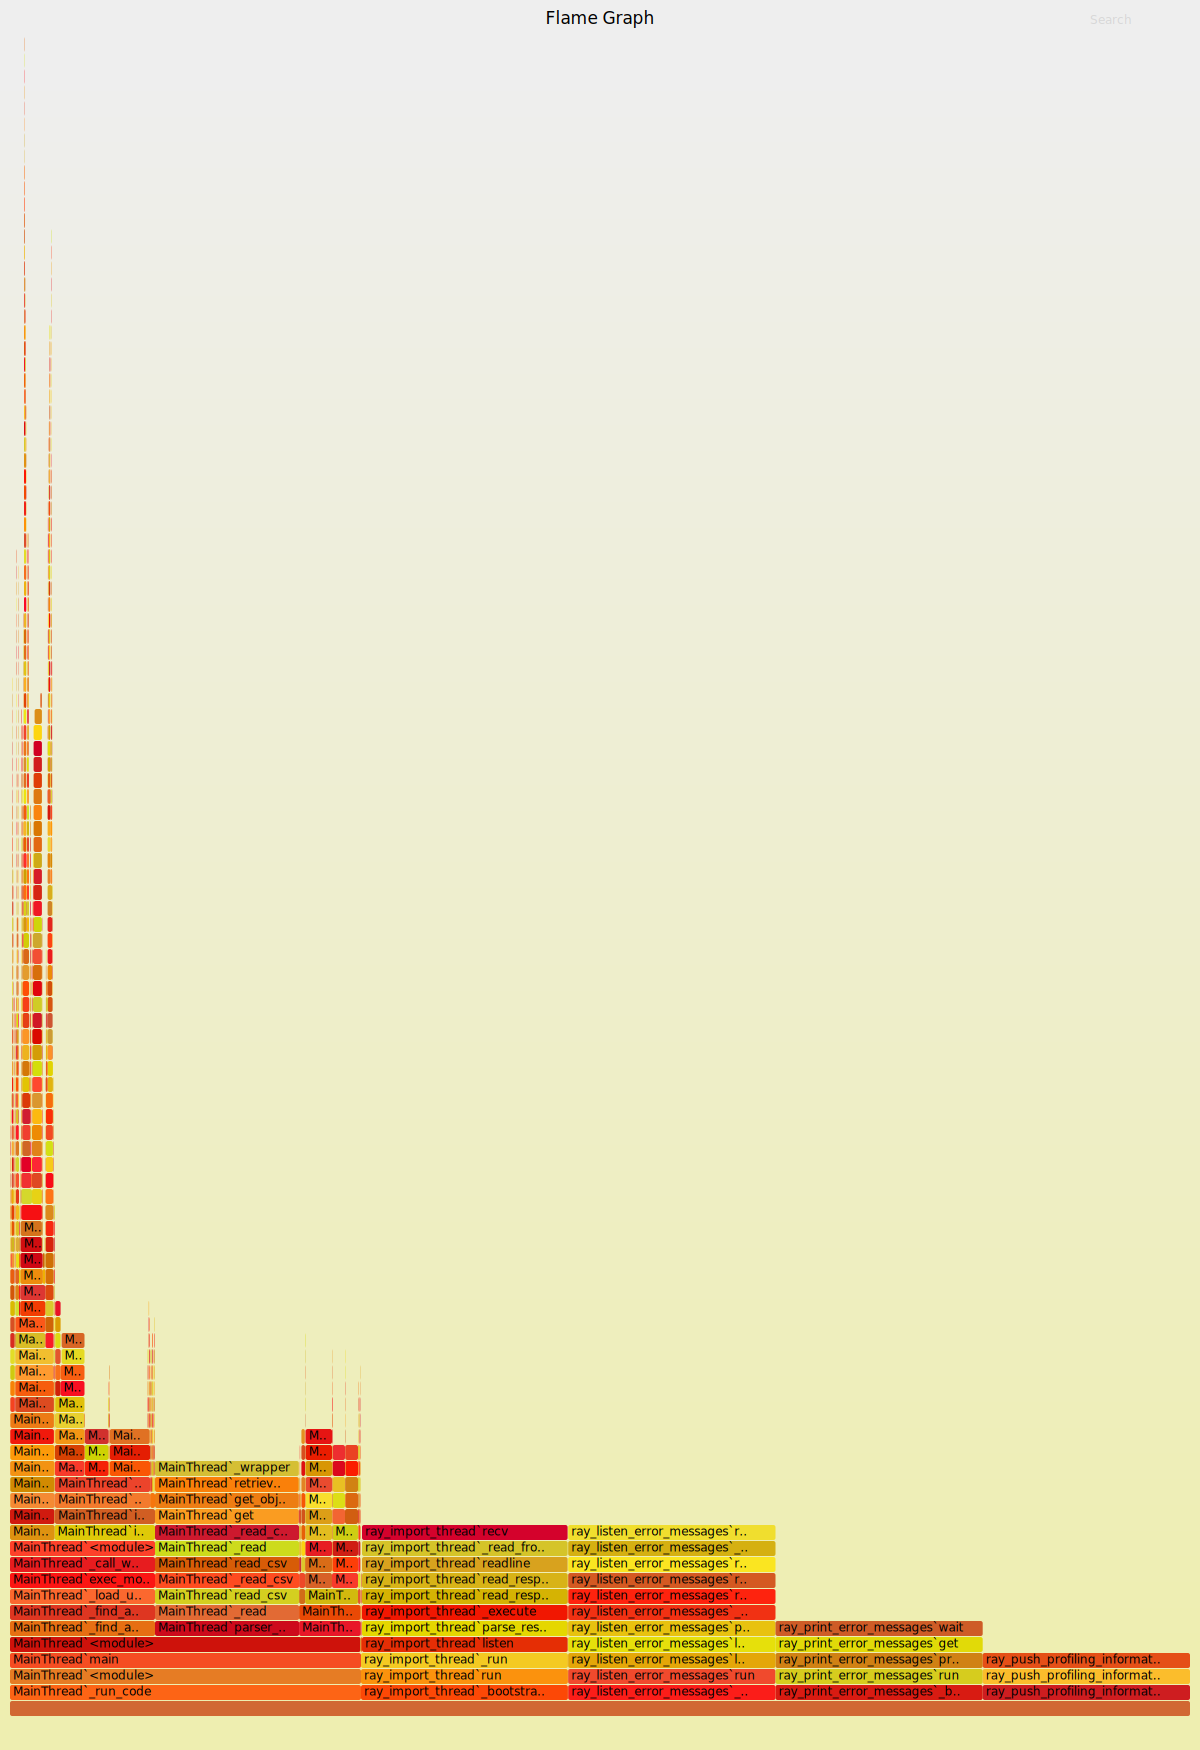

In [62]:
display(SVG("img/modin_grp_lrg.svg"))

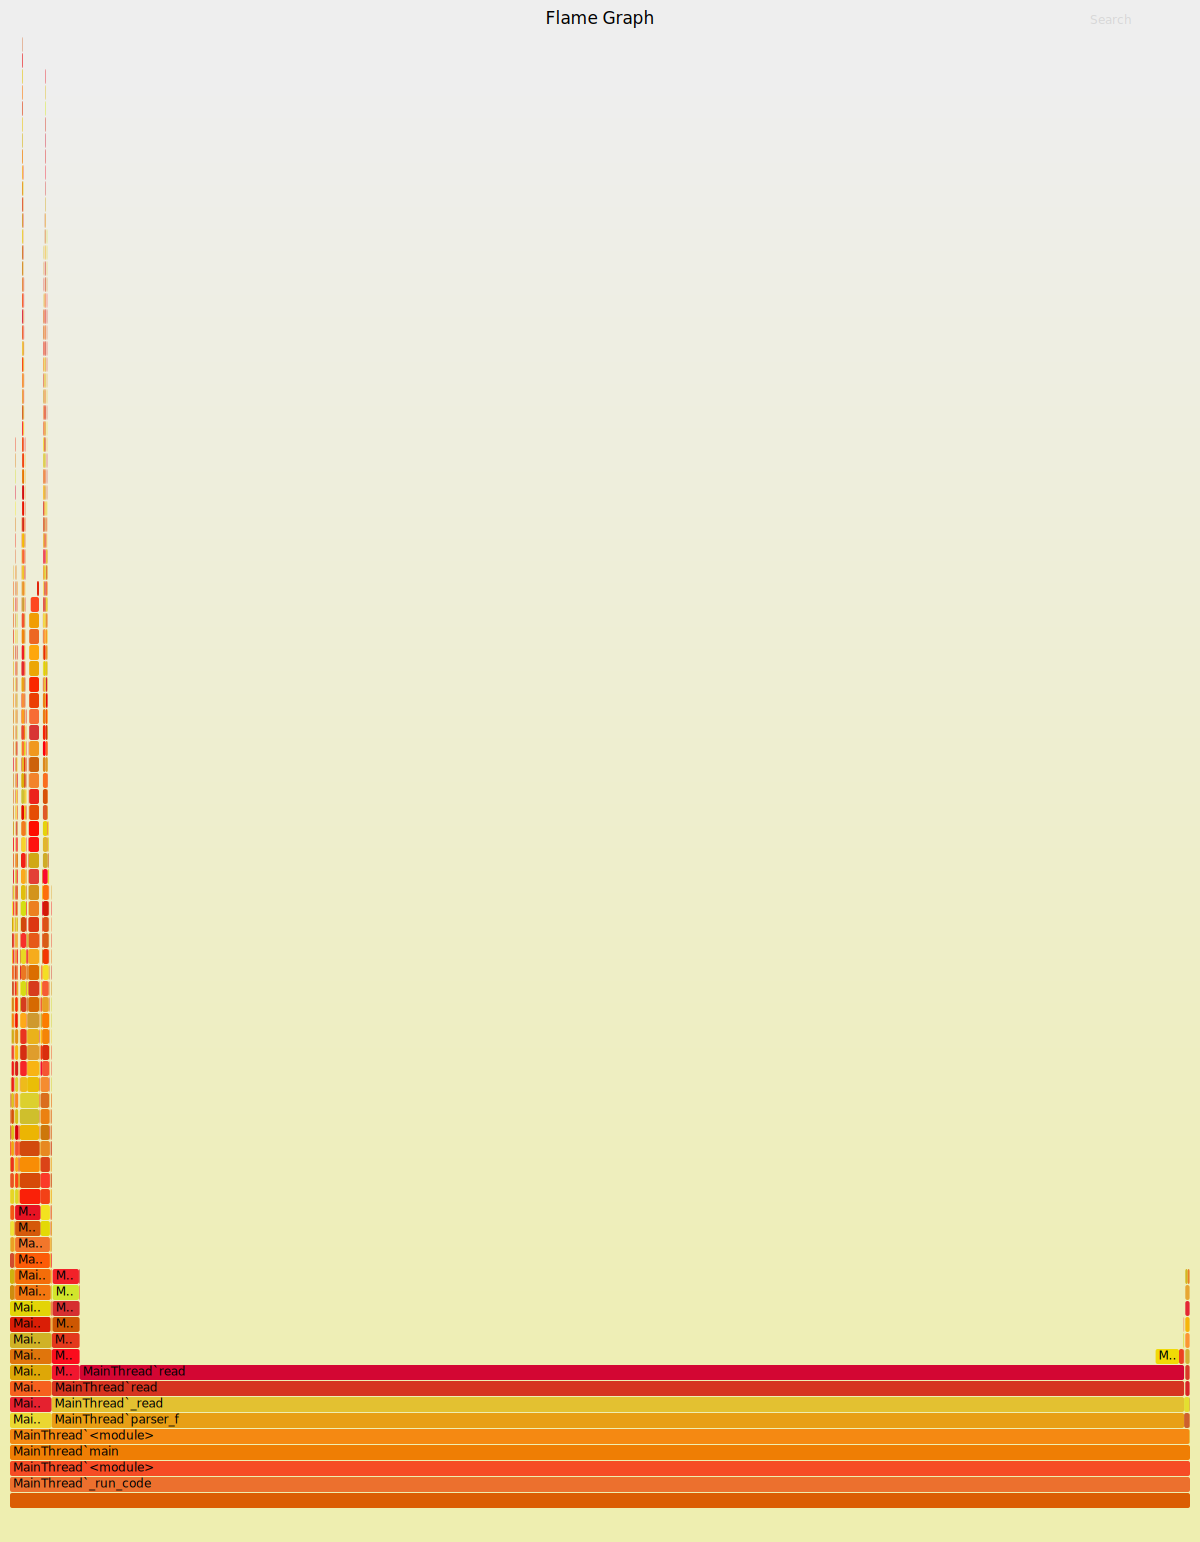

In [63]:
display(SVG("img/pandas_grp_lrg.svg"))